In [1]:
%config InlineBackend.figure_format = 'retina'
from dataclasses import dataclass
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from hmr import Reloader
import heatgraphy as hg
hg = Reloader(hg)

In [2]:
onco = pd.read_csv("data/PATIENT_DATA_oncoprint.tsv", sep="\t")
onco = onco.iloc[:, range(20)]
mut_events = ['CNA', 'MUTATIONS', 'MRNA', 'PROTEIN', 'STRUCTURAL_VARIANT']

# Fix broken names
onco.replace('amp_rec', 'Amplification', inplace=True)
onco.replace('homdel_rec', 'Deep Deletion', inplace=True)
onco.replace('splice', 'Splice Mutation (putative driver)', inplace=True)
onco.replace('splice_rec', 'Splice Mutation (putative passenger)', inplace=True)
onco.replace('sv', 'Structural Variant (putative driver)', inplace=True)
onco.replace('sv_rec', 'Structural Variant (putative passenger)', inplace=True)

onco_events = onco[onco['track_type'].isin(mut_events)].set_index(['track_name', 'track_type'])
onco_exp = onco[~onco['track_type'].isin(mut_events)].set_index(['track_name', 'track_type'])

In [3]:
import oncoprint as oc
oc = Reloader(oc)

In [4]:
tracks = [oc.Track(ix[0], ix[1], row.values) for ix, row in onco_events.iterrows()]

In [5]:
all_events = np.unique(onco_events.to_numpy(dtype=str).flatten())
all_events = all_events[all_events != 'nan']

tl = oc.TrackList(tracks)

# tl.get_event('Amplification')

In [6]:
all_events

array(['Amplification', 'Deep Deletion',
       'Missense Mutation (putative driver)',
       'Missense Mutation (putative passenger)',
       'Splice Mutation (putative driver)',
       'Structural Variant (putative driver)',
       'Truncating mutation (putative passenger)'], dtype='<U40')

In [7]:
pieces_mapper = {
    'Amplification': hg.layers.FracRect(color='red', frac=(.8, .8)), 
    'Deep Deletion': hg.layers.FracRect(color='blue', frac=(.8, .8)),
    'Inframe Mutation (putative driver)': hg.layers.FracRect(color='brown', frac=(.8, .4)),
    'Missense Mutation (putative driver)': hg.layers.FracRect(color='#008000', frac=(.8, .4)),
    'Missense Mutation (putative passenger)': hg.layers.FracRect(color='#f0b87b', frac=(.8, .4)),
    'Splice Mutation (putative driver)': hg.layers.FracRect(color='#d78440', frac=(.8, .4)),
    'Structural Variant (putative driver)': hg.layers.FracRect(color='#7f28c1', frac=(.8, .6)),
    'Truncating mutation (putative passenger)': hg.layers.FracRect(color='#000000', frac=(.8, .4))
}

In [8]:
amp = tl.get_event("Amplification")
layers=[
    np.ones(amp.shape),
]
pieces = [
    hg.layers.FracRect(color='.9', frac=(.8, .8), label="No alterations"),
]

for event in all_events:
    layer_data = tl.get_event(event)
    layers.append(layer_data)
    p = pieces_mapper[event]
    p.set_label(event)
    pieces.append(p)

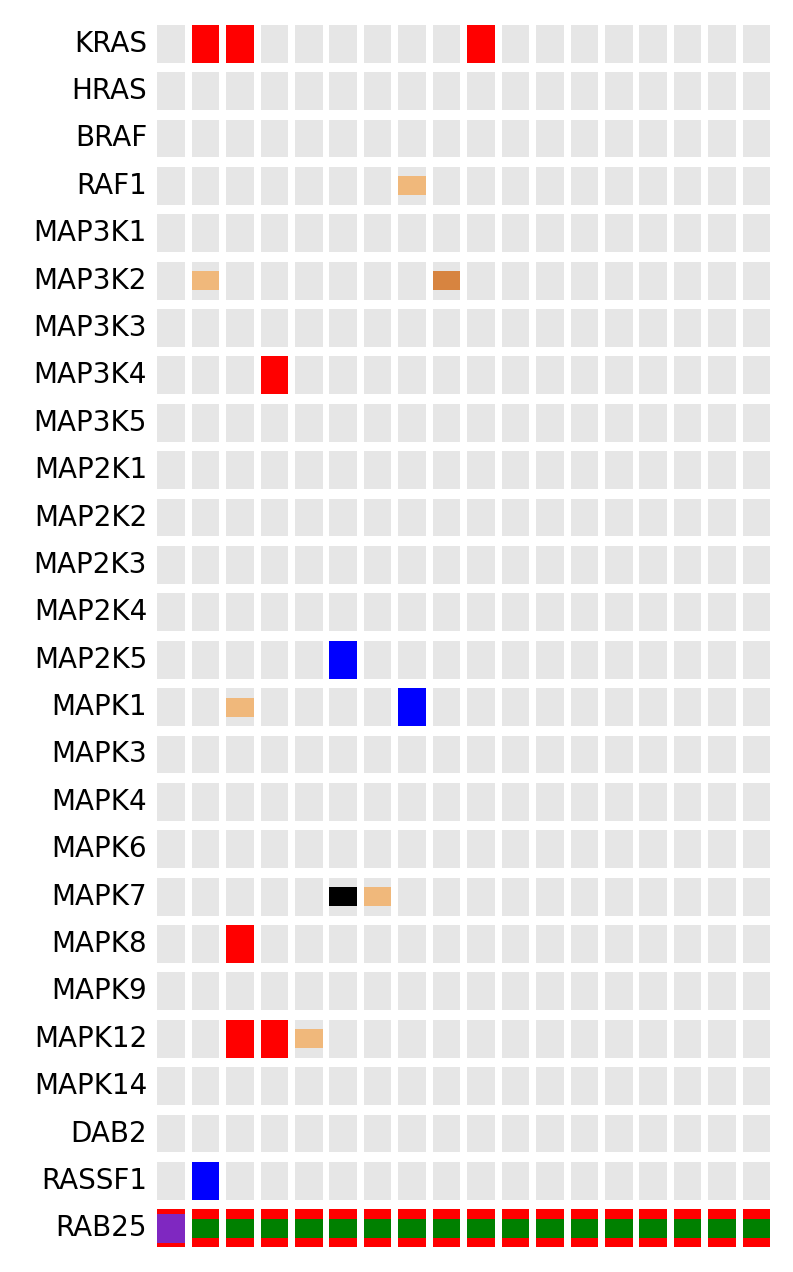

In [20]:
l = hg.Layers(layers=layers, pieces=pieces, width=5, height=10)
l.add_left(hg.plotter.Labels(tl.names, text_pad=.1))
# l.add_legends()
l.render()

In [10]:
num_tracks = [oc.NumericTrack(ix[0], ix[1], row.values.astype(float)) for ix, row in onco_exp.iterrows()]

In [11]:
ntl = oc.NumTrackList(num_tracks)
matrix = ntl.get_matrix()

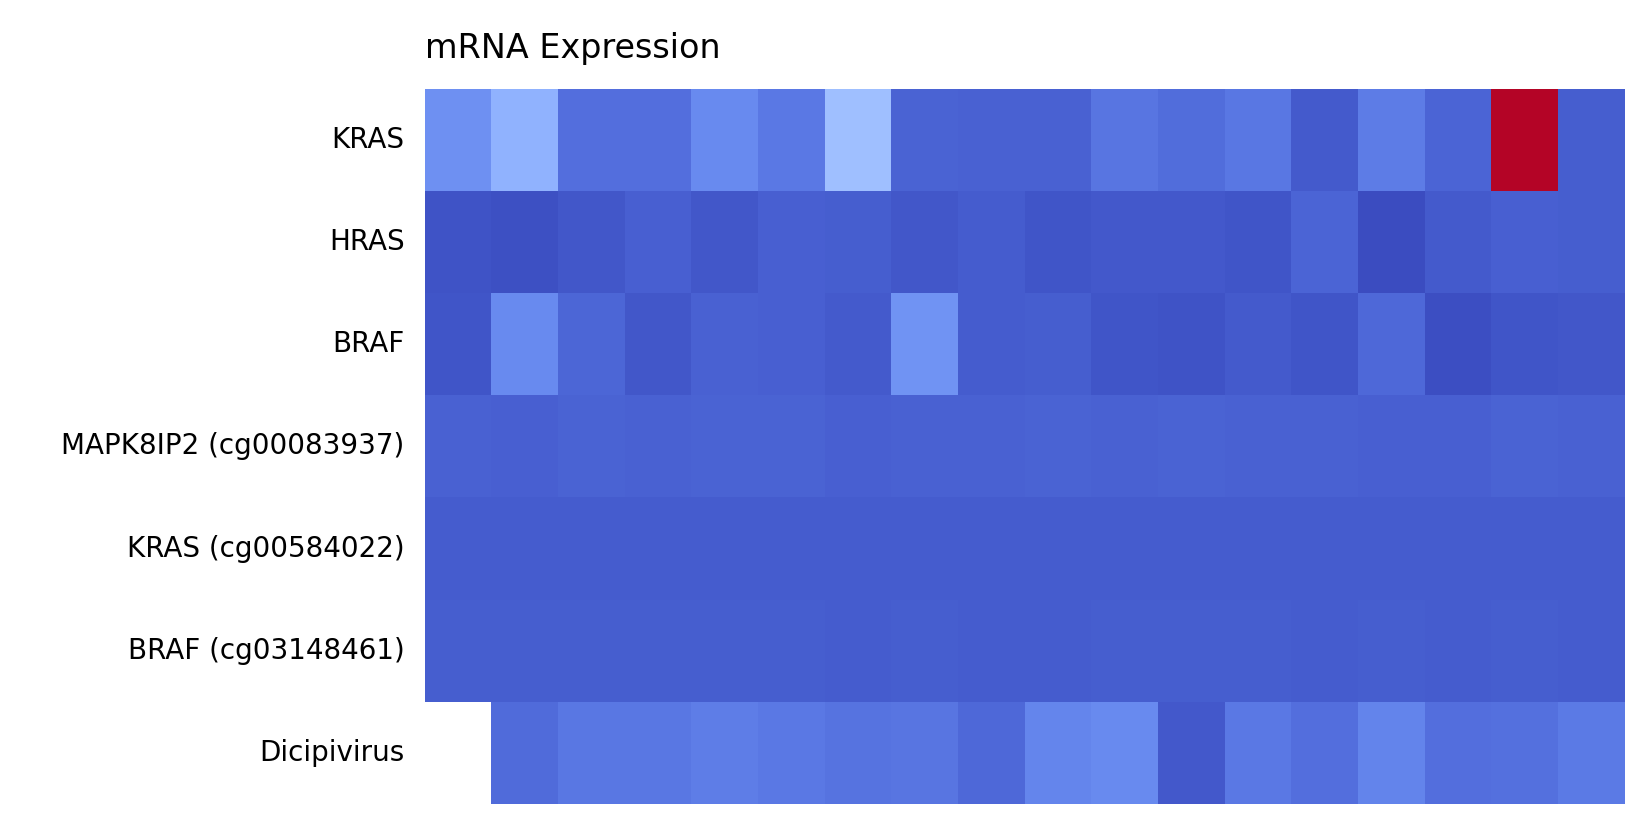

In [30]:
h = hg.Heatmap(matrix, width=5, height=3)
h.add_left(hg.plotter.Labels(ntl.names, text_pad=.1))
h.add_title(top="mRNA Expression", align="left")
h.render()

In [27]:
h.grid.main_w

5.0

In [28]:
l.grid.main_w

5.0

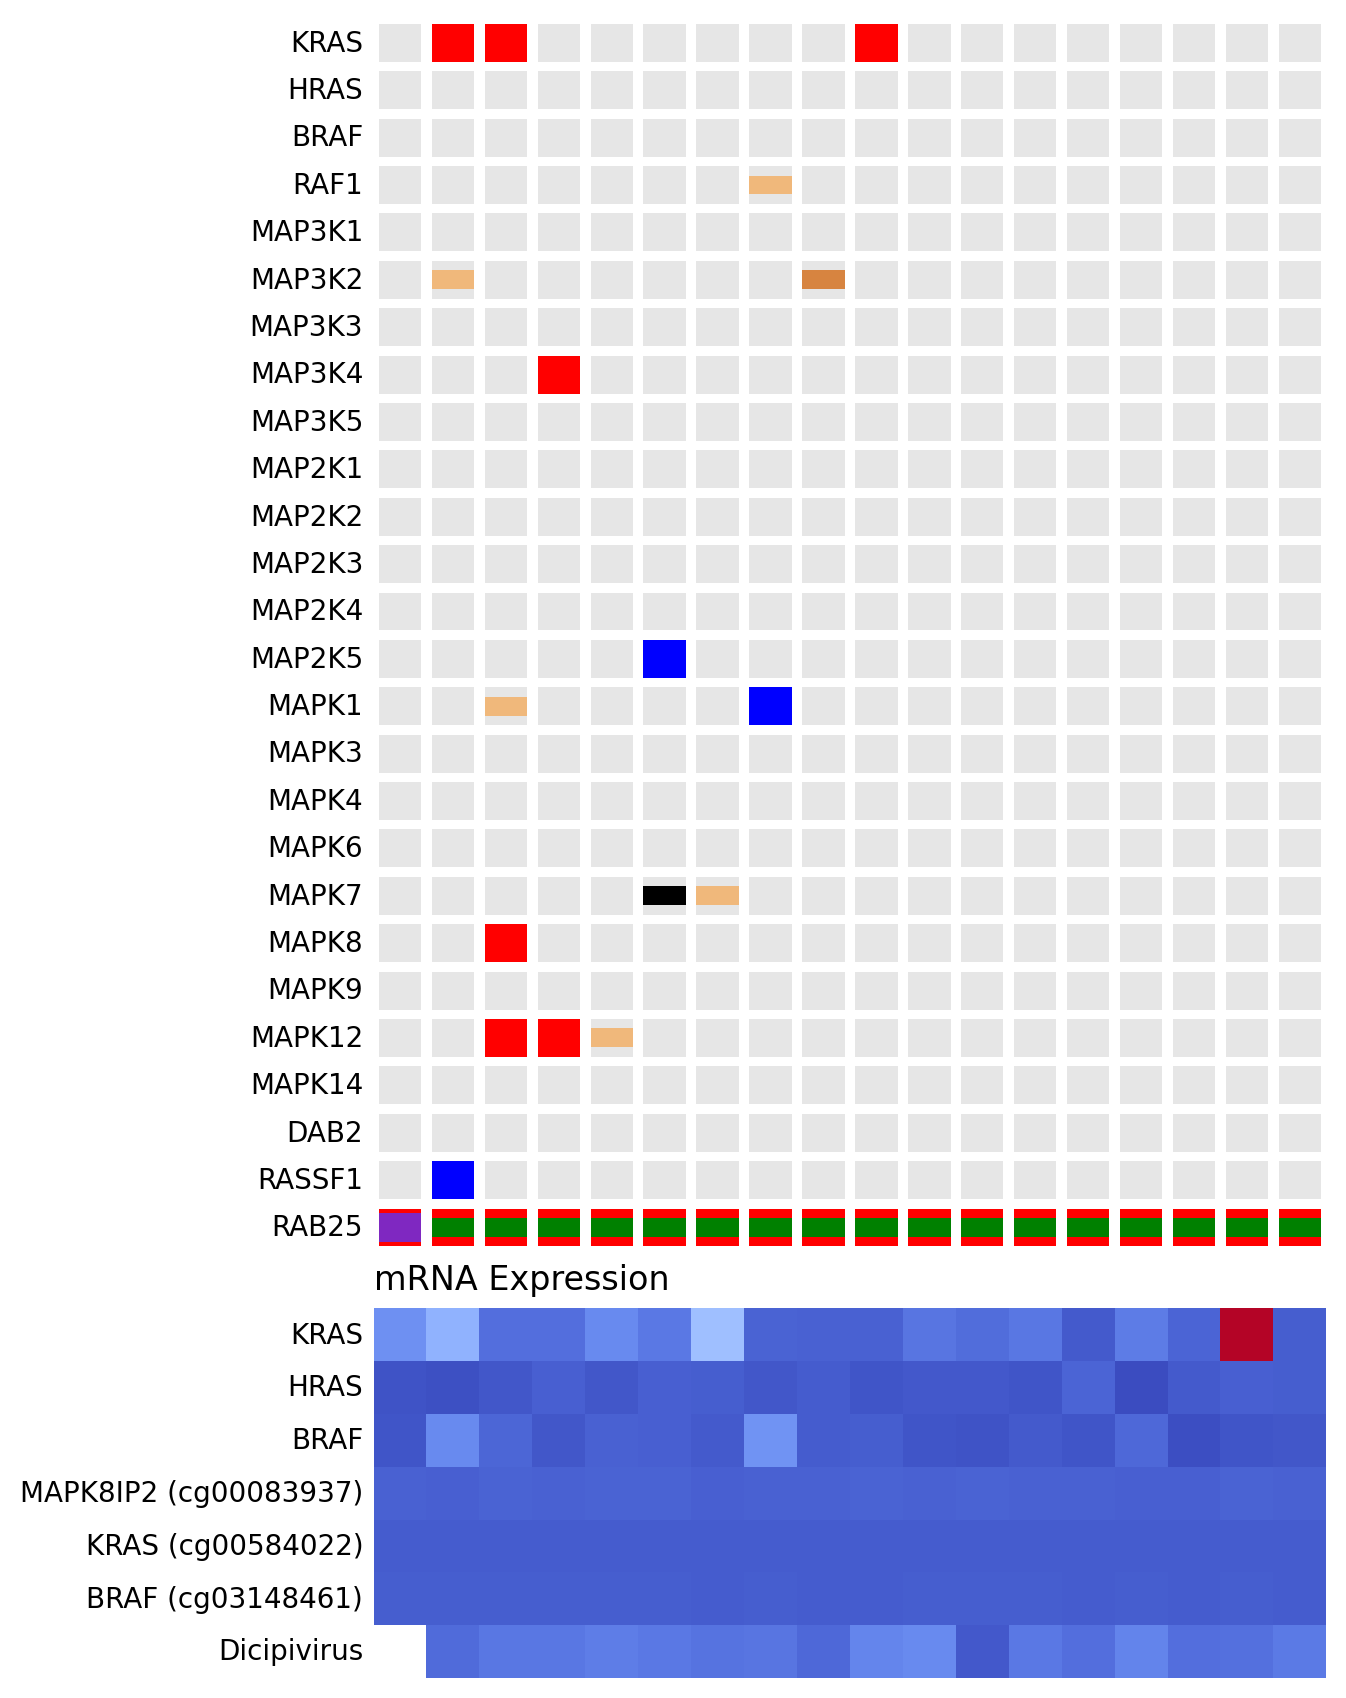

In [31]:
(l / h).render()